In [1]:
from sklearn.svm import SVC 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr,pointbiserialr,iqr
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix,classification_report,root_mean_squared_error, r2_score
import numpy as np
from imblearn.combine import SMOTEENN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
def create_histplot(feature,df):
    skew=0
    if np.mean(df[feature])>np.median(df[feature]):
        skew="right"
    elif np.mean(df[feature])<np.median(df[feature]):
        skew="left"
    else:
        skew="normal"

    sns.histplot(data=df,x=feature,kde=True)
    #plt.title(f"Histogram of {feature}")
    #plt.show()
    print(f"{feature} has {skew} skew")


In [3]:
def check_correlation(df):
    corr_list=[]
    features=list(df.columns)
    features_2=list(df.columns)
    target=features_2[-1]
    label_encoder=preprocessing.LabelEncoder()
    df[target]=label_encoder.fit_transform(df[target])
    print(features_2)
    for feature in features:
        features_2.remove(feature)
        for other_features in features_2:
            if other_features==target:
                corr,_=pointbiserialr(df[other_features],df[feature])
            else:
                corr,_=spearmanr(df[feature],df[other_features])
            corr_list.append({'column_1':feature, 'column_2':other_features,'correlation':corr})
    corr_df=pd.DataFrame(corr_list)
    return corr_df
            

    

In [4]:
def create_boxplot(feature,df):
    Q1=np.percentile(df[feature],25)
    Q3=np.percentile(df[feature],75)
    IQR=Q3-Q1
    outlier_Q1=Q1-1.5*IQR
    outlier_Q3=Q3+1.5*IQR
    ax=sns.boxplot(x=df[feature])
    ax.axvline(outlier_Q1, color="r", dashes=(2, 2))
    ax.axvline(outlier_Q3,color="r",dashes=(2, 2))
    ax.text(outlier_Q1, 0.99, f"{outlier_Q1:.2f}", color='r', ha='right', va='top', rotation=90,
            transform=ax.get_xaxis_transform())
    ax.text(outlier_Q3, 0.99, f"{outlier_Q3:.2f}", color='r', ha='right', va='top', rotation=90,
            transform=ax.get_xaxis_transform())
    plt.show()


In [5]:
raisin_df=pd.read_csv("datasets\Raisin_Dataset\Raisin_Dataset.csv")
raisin_df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


Area has right skew
MajorAxisLength has right skew
MinorAxisLength has right skew
Eccentricity has left skew
ConvexArea has right skew
Extent has left skew
Perimeter has right skew


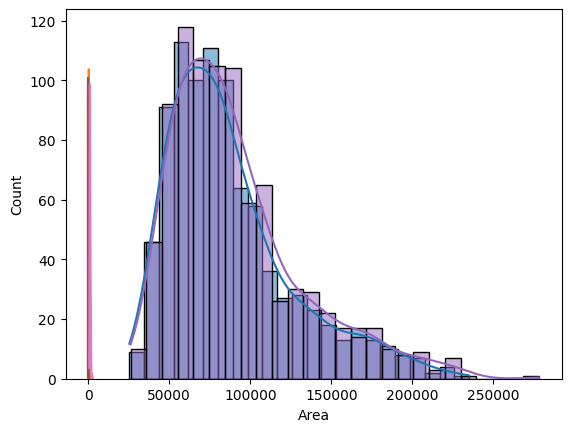

In [6]:
for feature in raisin_df.columns.drop('Class'):
    create_histplot(feature,raisin_df)

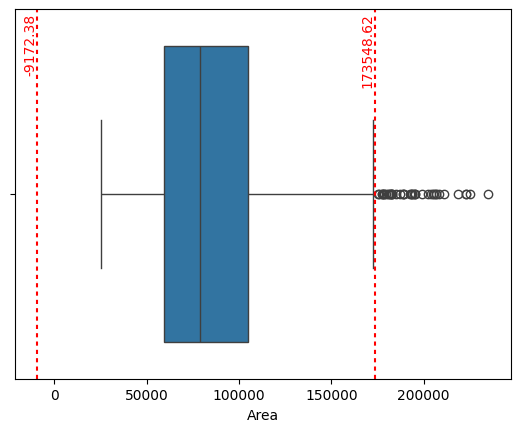

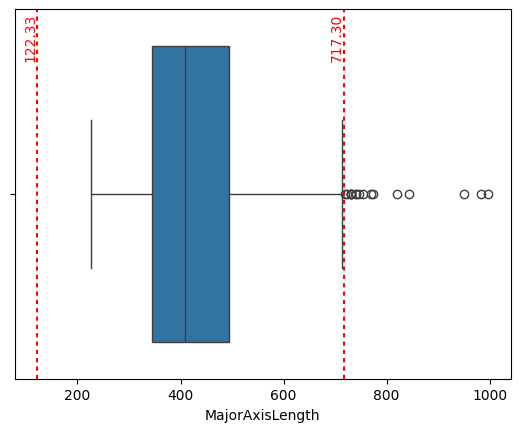

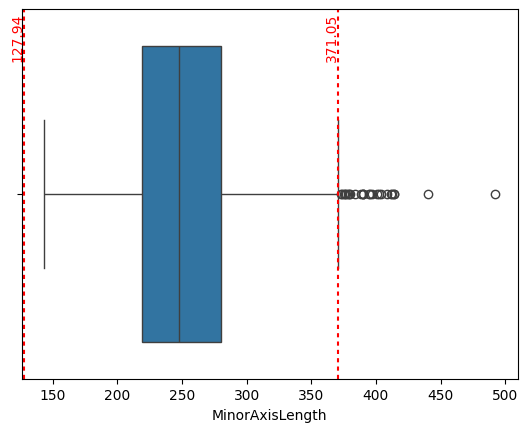

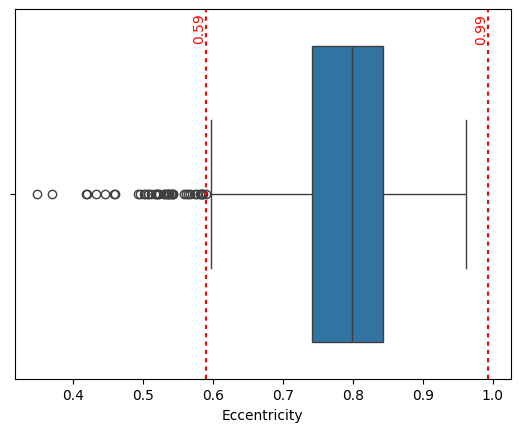

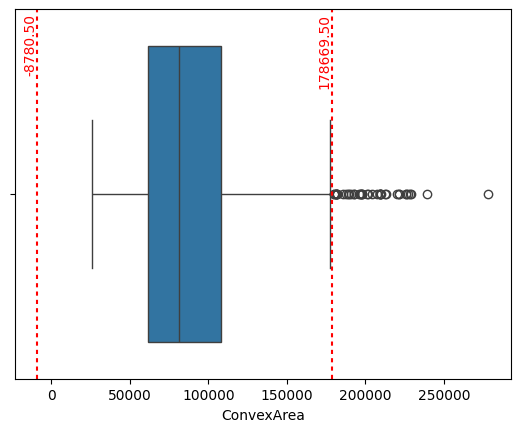

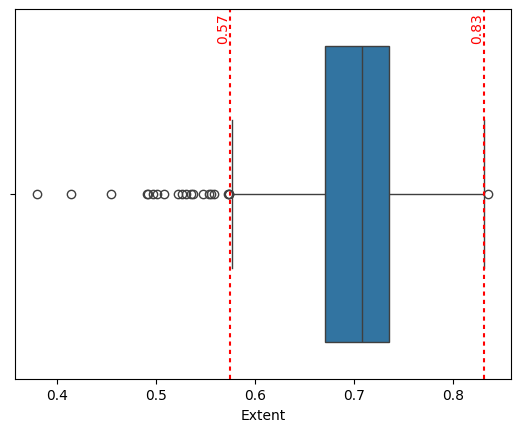

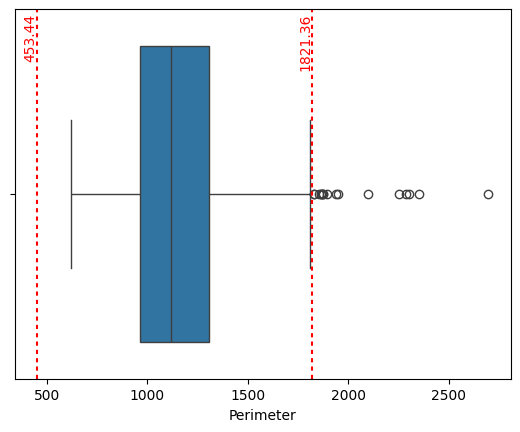

In [7]:
for feature in raisin_df.columns.drop('Class'):
    create_boxplot(feature,raisin_df)

In [8]:
raisin_df.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [9]:
raisin_df['Class'].unique()


array(['Kecimen', 'Besni'], dtype=object)

In [10]:
check_correlation(raisin_df)

['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter', 'Class']


,column_1,column_2,correlation
0,Area,MajorAxisLength,0.948592
1,Area,MinorAxisLength,0.904600
2,Area,Eccentricity,0.402502
3,Area,ConvexArea,0.999110
4,Area,Extent,0.042635
5,Area,Perimeter,0.982658
6,Area,Class,-0.625715
7,MajorAxisLength,MinorAxisLength,0.732637
8,MajorAxisLength,Eccentricity,0.653697
9,MajorAxisLength,ConvexArea,0.952678


<Axes: xlabel='Class', ylabel='count'>

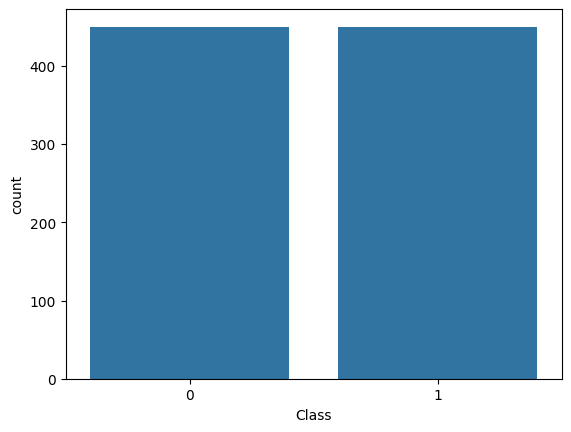

In [11]:
sns.countplot(data=raisin_df,x='Class')

In [12]:
features_to_drop=['Area','MinorAxisLength','ConvexArea']


In [13]:
raisin_df_reduced=raisin_df.drop(features_to_drop,axis=1)

In [14]:
raisin_df_reduced.head()

,MajorAxisLength,Eccentricity,Extent,Perimeter,Class
0,442.246011,0.819738,0.758651,1184.040,1
1,406.690687,0.801805,0.684130,1121.786,1
2,442.267048,0.798354,0.637613,1208.575,1
3,286.540559,0.684989,0.699599,844.162,1
4,352.190770,0.564011,0.792772,1073.251,1


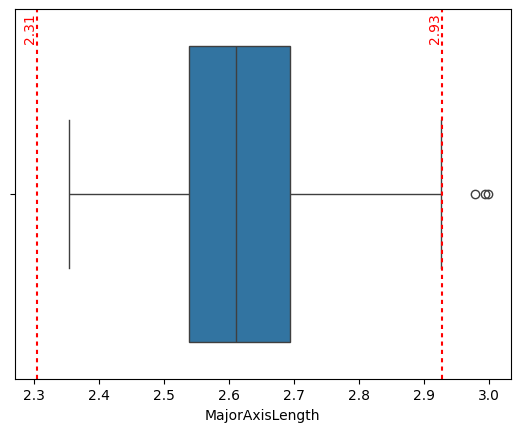

In [15]:
raisin_df_reduced['MajorAxisLength']=np.log10(raisin_df_reduced['MajorAxisLength'])
create_boxplot('MajorAxisLength',raisin_df_reduced)

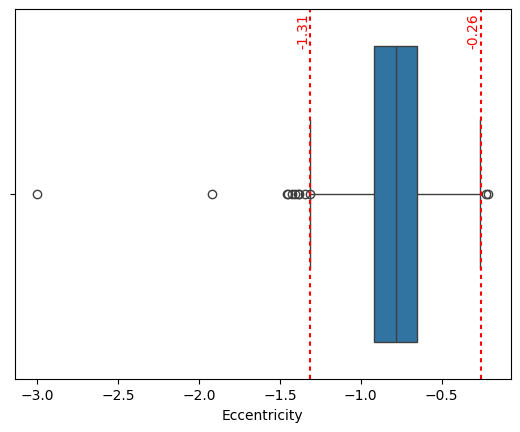

In [16]:
raisin_df_reduced['Eccentricity']=np.log10(np.max(raisin_df_reduced['Eccentricity'])-raisin_df_reduced['Eccentricity']+1e-3)
create_boxplot('Eccentricity',raisin_df_reduced)

Eccentricity has left skew


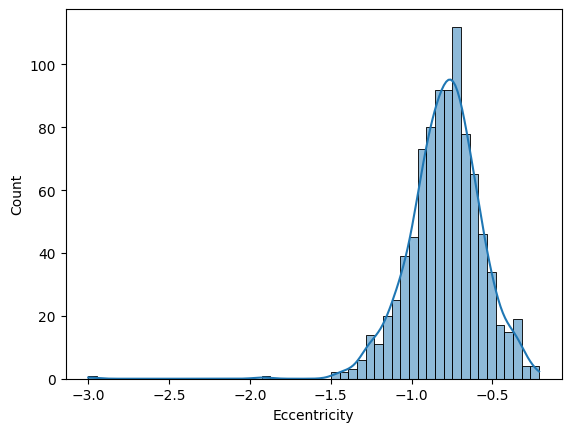

In [17]:
create_histplot('Eccentricity',raisin_df_reduced)

In [18]:
X=raisin_df_reduced.drop(['Class'],axis=1)
y=raisin_df_reduced['Class']

#undersampling and oversampling
#smote_enn=SMOTEENN(random_state=42)
#X_resampled, y_resampled = smote_enn.fit_resample(X, y)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [19]:
scaler=preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [20]:
#smote_enn=SMOTEENN(random_state=42)
#X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [21]:
model=SVC(random_state=42)
model.fit(X_train,y_train)

SVC(random_state=42)

In [22]:
X_test

,MajorAxisLength,Eccentricity,Extent,Perimeter
502,2.602509,-0.831479,0.642462,1101.879
637,2.799785,-0.969272,0.751899,1646.559
701,2.757931,-0.795805,0.777525,1500.251
237,2.554326,-0.943621,0.703403,929.471
707,2.672192,-0.866322,0.754547,1265.032
...,...,...,...,...
499,2.681945,-0.877989,0.639614,1289.209
538,2.771720,-0.907097,0.648528,1595.364
780,2.620279,-0.949617,0.725455,1085.215
702,2.813583,-1.122456,0.719326,1633.723


In [23]:
y_pred=model.predict(X_test)
acc=model.score(X_test,y_test)

In [24]:
tn, fp, fn, tp=confusion_matrix(y_test,y_pred).ravel()
print(f"")

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        90
           1       0.80      0.93      0.86        90

    accuracy                           0.85       180
   macro avg       0.86      0.85      0.85       180
weighted avg       0.86      0.85      0.85       180



In [26]:
model.n_support_

array([150, 150], dtype=int32)

In [27]:
model_tree=DecisionTreeClassifier(criterion='entropy',random_state=42)
model_tree.fit(X_train,y_train)
y_pred=model_tree.predict(X_test)
score_tree=model_tree.score(X_test,y_test)
print(f"score is {score_tree:.4f}")

score is 0.8278


In [28]:
model_forest=RandomForestClassifier(random_state=42)
param_grid={'n_estimators':[5,20,80],
    'max_depth':[3,7,10]
        }

In [29]:
grid_search_forest=GridSearchCV(estimator=model_forest,param_grid=param_grid,cv=5,scoring='r2')
grid_search_forest.fit(X_train_scaled,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 7, 10], 'n_estimators': [5, 20, 80]},
             scoring='r2')

In [30]:
print(f"best parameters:{grid_search_forest.best_params_}")

best parameters:{'max_depth': 7, 'n_estimators': 80}


In [31]:
best_random_forest=grid_search_forest.best_estimator_
best_random_forest_pred=best_random_forest.predict(X_test_scaled)
best_random_forest.score(X_test_scaled,y_test)


0.8777777777777778

In [32]:
model_xgb=XGBClassifier(random_state=42)
param_grid={
    'n_estimators':[5,10,100],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,5,10]

}
grid_search_xgboost=GridSearchCV(estimator=model_xgb,param_grid=param_grid,cv=5,scoring='r2')
grid_search_xgboost.fit(X_train_scaled,y_train)
print(f"best parameter {grid_search_xgboost.best_params_}")
best_xgboost=grid_search_xgboost.best_estimator_
y_pred=best_xgboost.predict(X_test_scaled)
print(root_mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred)) #1 is the best , it can be negative - very bad #how much variablility in data cab be predicted by the model

best parameter {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.3651483716701107
0.4666666666666667
